In this work, we are solving a binary classification problem using generated data with 2 classes, we use the function make_classification to generate the data

## Dataset

We will use the following randomly generated data from sklearn.

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification

In [2]:
#Load the iris dataset from sklearn
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

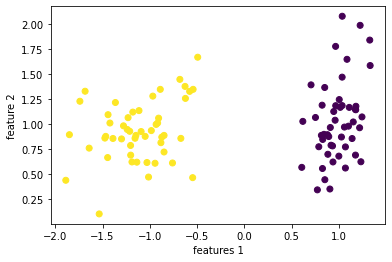

In [3]:
# vizualize the data
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('features 1')
plt.ylabel('feature 2')
plt.show()

In [4]:
def train_test_split(X,y):
  '''
  this function takes as input the sample X and the corresponding features y
  and output the training and test set
  '''
  np.random.seed(0) # To demonstrate that if we use the same seed value twice, we will get the same random number twice
  
  train_size = 0.8
  n = int(len(X)*train_size)
  indices = np.arange(len(X))
  np.random.shuffle(indices)
  train_idx = indices[: n]
  test_idx = indices[n:]
  X_train, y_train = X[train_idx], y[train_idx]
  X_test, y_test = X[test_idx], y[test_idx]

  return X_train, y_train, X_test, y_test

In [5]:
X_train, y_train, X_test, y_test = train_test_split(X,y)
print(f" the training shape is: {X_train.shape}")
print(f" the test shape is: {X_test.shape}")

 the training shape is: (80, 2)
 the test shape is: (20, 2)


## Recaps

1. Logistic/sigmoid function:
\begin{equation}
σ(z)= \dfrac{1}{1+ e^{-z}}
\end{equation}
where  $z= x w$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
σ'(z)= σ(z)(1-σ(z))
\end{equation}
3. Negative log likelihood or Cross-entropy loss:
\begin{equation}
l(w)= -\dfrac{1}{N}\sum_{i= 1}^{N} \left(y^{(i)}_{true} \times \log y^{(i)}_{pred} + (1-y^{(i)}_{true}) \times \log (1-y^{(i)}_{pred}) \right)
\end{equation}

where:

 $y_{pred}= σ(z)$, $z= xw$.

4. Derivative of Cross-entropy loss with respective to $w$:
\begin{equation}
dl(w)= -\dfrac{1}{N}x^T(y_{true} -y_{ped} )
\end{equation}
5. Apply Batch gradient descent to update $w$.



In [80]:
class LogisticRegression:
  '''
  The goal of this class is to create a LogisticRegression class, 
  that we will use as our model to classify data point into a corresponding class
  '''
  def __init__(self,lr,n_epochs):
    self.lr = lr
    self.n_epochs = n_epochs
    self.train_losses = []
    self.w = None
    self.weight = []

  def add_ones(self, x):
    '''
    Inputs: x

    Output: x with a new column of ones
    '''
    ones_ = np.ones((x.shape[0], 1))

    return np.hstack((ones_, x))


  def sigmoid(self, x):
    '''Input: x
    
       Output: sigmoid(x) = 1/(1 + exp(-x))
    
    '''

    return 1/(1 + np.exp(-x@self.w))

  def cross_entropy(self, x, y_true):
    '''
    Inputs: x, y_true

    Output: (-1/N)sum(y_true*log(ypred) + (1 - y_true)*log(1 - ypred))
    
    '''
    y_pred = self.sigmoid(x)
    loss = -(np.mean((y_true@np.log(y_pred)) + (1-y_true)@np.log(1-y_pred)))
    return loss

  
  def predict_proba(self,x):  #This function will use the sigmoid function to compute the probalities
    '''
    Input: x
    Output: sigmoid(x)
    
    '''
    x= self.add_ones(x)
    proba = self.sigmoid(x)
    return proba


  def predict(self,x):
    '''
     Input: x
     Output: either 0 or 1 
      
    '''
    probas = self.predict_proba(x)
    output = np.where(probas>=0.5, 1, 0)      #convert the probalities into 0 and 1 by using a treshold=0.5
    return output


  def fit(self,x,y):
    # Add ones to x

    x = self.add_ones(x)

    #y = y.reshape(-1,1)

    # Initialize w to zeros vector >>> (x.shape[1])
    self.w = np.zeros((x.shape[1]))

    for epoch in range(self.n_epochs):
      # make predictions
      ypred = self.sigmoid(x)

      #compute the gradient
      dl = -x.T@(y - ypred)*(1/x.shape[0]) #-(1/x.shape[0])*(y - ypred).T@x # # #

      #update rule
      self.w = self.w - self.lr*dl

      #Compute and append the training loss in a list
      loss = self.cross_entropy(x, y)

      self.weight.append(self.w)

      self.train_losses.append(loss)

      if epoch%100 == 0:
        print(f'loss for epoch {epoch}  : {loss}')

  def accuracy(self,y_true, y_pred):

    acc = np.mean(y_true == y_pred)
    return acc


In [81]:
model = LogisticRegression(lr = 0.01, n_epochs=10000)
model.fit(X_train,y_train)

loss for epoch 0  : 55.22497145577333
loss for epoch 100  : 38.18027435501498
loss for epoch 200  : 28.424410605307244
loss for epoch 300  : 22.40195334438553
loss for epoch 400  : 18.4045174249372
loss for epoch 500  : 15.589193736192929
loss for epoch 600  : 13.511443228620873
loss for epoch 700  : 11.92023849987087
loss for epoch 800  : 10.664998483115726
loss for epoch 900  : 9.650639524971396
loss for epoch 1000  : 8.814468843018657
loss for epoch 1100  : 8.113612307824177
loss for epoch 1200  : 7.517823485867062
loss for epoch 1300  : 7.005187611565688
loss for epoch 1400  : 6.559455865821882
loss for epoch 1500  : 6.168335531342683
loss for epoch 1600  : 5.822360859918506
loss for epoch 1700  : 5.5141279925622255
loss for epoch 1800  : 5.2377645680612295
loss for epoch 1900  : 4.988554442583304
loss for epoch 2000  : 4.7626672437683935
loss for epoch 2100  : 4.556960221381026
loss for epoch 2200  : 4.3688308734969805
loss for epoch 2300  : 4.196105829916609
loss for epoch 2400  

In [82]:
ypred_train = model.predict(X_train)
acc = model.accuracy(y_train,ypred_train)
print(f"The training accuracy is: {acc}")
print(" ")

ypred_test = model.predict(X_test)
acc = model.accuracy(y_test,ypred_test)
print(f"The test accuracy is: {acc}")

The training accuracy is: 1.0
 
The test accuracy is: 1.0


In [92]:
def plot_decision_boundary(X, w, b,y_train):
    
    # z = w1x1 + w2x2 + w0
    # one can think of the decision boundary as the line x2=mx1+c
    # Solving we find m and c
    x1 = np.array([X[:,0].min(), X[:,0].max()])
    m = -w[1]/w[2]
    c = -b/w[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.scatter(X[:, 0], X[:, 1],c=y_train)
    plt.scatter(X[:, 0], X[:, 1], c=y_train)
    plt.xlim([-2, 3])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

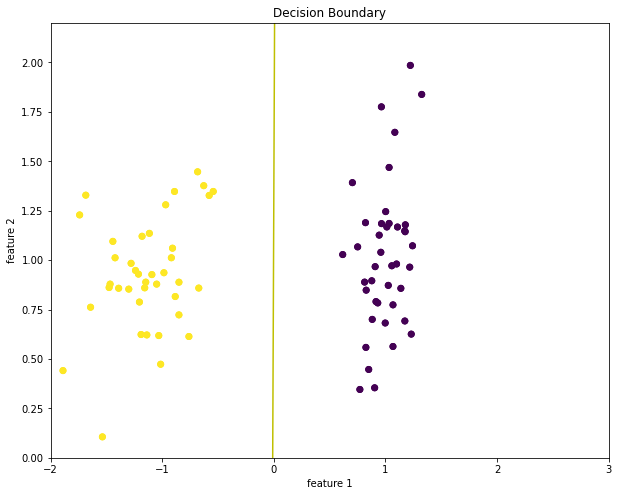

In [93]:
plot_decision_boundary(X_train,model.w,model.w[0],y_train)

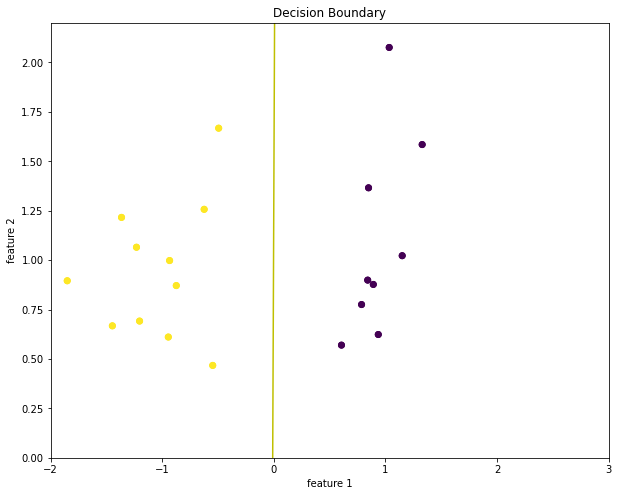

In [94]:
plot_decision_boundary(X_test,model.w,model.w[0],y_test)

## Let’s test out our code for data that is not linearly separable.


We will see that it will give bad prediction

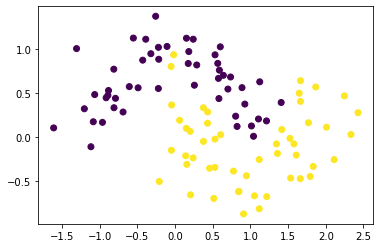

In [95]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.24)
plt.scatter(X[:,0],X[:,1], c= y)

In [97]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

In [98]:
ypred_train = model.predict(X_train)
acc = model.accuracy(y_train,ypred_train)
print(f"The training accuracy is: {acc}")
print(" ")

ypred_test = model.predict(X_test)
acc = model.accuracy(y_test,ypred_test)
print(f"The test accuracy is: {acc}")

The training accuracy is: 0.275
 
The test accuracy is: 0.4


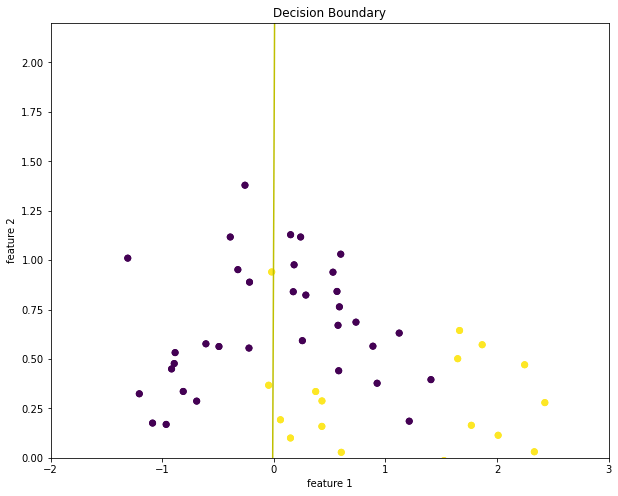

In [99]:
plot_decision_boundary(X_train,model.w,model.w[0],y_train)

So we have to use another method for that